# Projeto Final - Machine Learning I

## Sobre o projeto

- Dataset obtido no [Kaggle](https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling)
- Os dados serão utilizados para criar modelos de classificação
- Serão apresentados 4 algoritmos diferentes (escolher): KNN, árvore de decisão, random forest, bagging, MLP
- A avaliação dos modelos será realizada por meio de 4 métricas: MAE, MAP, RRSE, RNSE

## Etapas iniciais

**Importando as bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Abrindo o arquivo**

In [5]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Análise exploratória

**Removendo valores duplicados, caso existam**

In [6]:
df = df.drop_duplicates()

**Removendo colunas desnecessárias**

In [7]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

**Informações gerais**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


**Transformando variáveis categóricas em dummies**

In [9]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [10]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
colunas = ['Gender', 'Geography']
for col in colunas:
    one_hot = pd.get_dummies(df[col], drop_first=True)
    df = df.drop(columns=[col])
    df = df.join(one_hot)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
 9   Male             10000 non-null  uint8  
 10  Germany          10000 non-null  uint8  
 11  Spain            10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 1.0 MB


In [12]:
df.isna().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Male               0
Germany            0
Spain              0
dtype: int64

In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


**Distribuição das variáveis**

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00
Male,10000.0,0.545700,0.497932,0.00,0.00,1.000,1.0000,1.00


**Distribuição da variável alvo 'Exited'**

,index,Exited
0,0,7963
1,1,2037


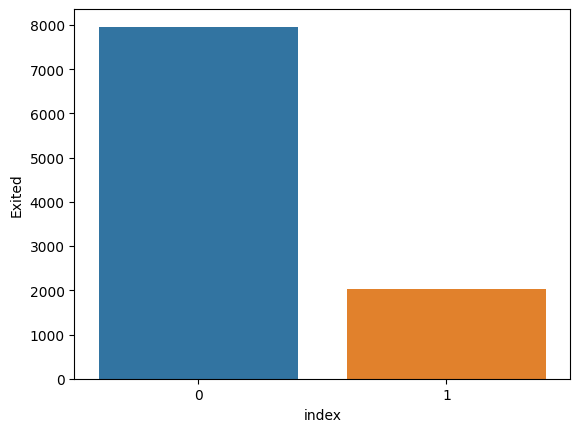

In [15]:
target = df['Exited'].value_counts().reset_index()
sns.barplot(data=target, x='index', y='Exited', );
target

### Identificando Outliers

In [16]:
numeric = ['Balance', "EstimatedSalary"]
df_numeric = df[numeric]
df_numeric.head()

,Balance,EstimatedSalary
0,0.00,101348.88
1,83807.86,112542.58
2,159660.80,113931.57
3,0.00,93826.63
4,125510.82,79084.10


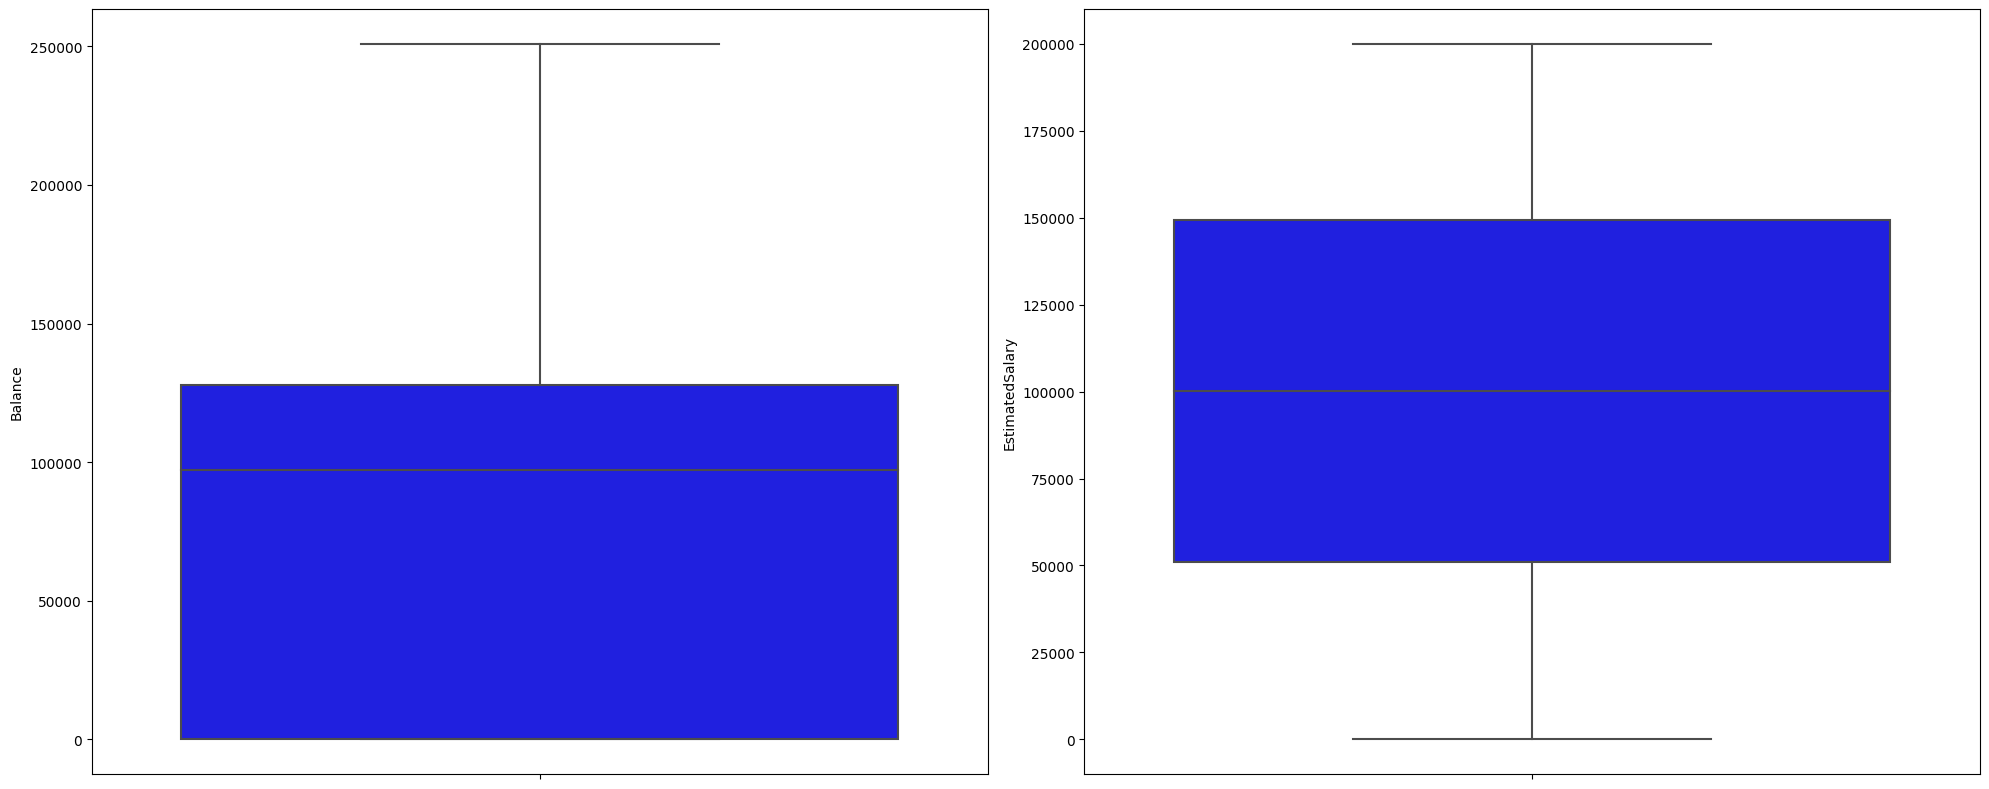

In [17]:
plt.figure(figsize=(20, 8))
for i in range(len(numeric)):
    plt.subplot(1, len(numeric), i + 1)
    sns.boxplot(y=df[numeric[i]], color='blue')
    plt.tight_layout()

In [18]:
for col in numeric:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1


    nilai_min = df[col].min()
    nilai_max = df[col].max()
    lower_lim = Q1 - (1.5*IQR)
    upper_lim = Q3 + (1.5*IQR)

    # Outliers
    if (nilai_min < lower_lim):
        print('Outliers inferiores encontrados na coluna',col,'<', lower_lim,'\n')
        print('Quantiadade de outliers inferiores na coluna',col, ':', len(list(df[df[col] < lower_lim])))
    elif (nilai_max > upper_lim):
        print('Outliers superiores encontrados na coluna',col,'>', upper_lim,'\n')
        print('Quantiadade de outliers superiores na coluna',col, ':', len(list(df[df[col] > upper_lim])))

    else:
        print('Nenhum outlier na coluna',col,'\n')


Nenhum outlier na coluna Balance 

Nenhum outlier na coluna EstimatedSalary 



### Distribuição dos Dados

<ipython-input-19-9756c38d5dcb>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numeric[i]], color='orange')
<ipython-input-19-9756c38d5dcb>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numeric[i]], color='orange')


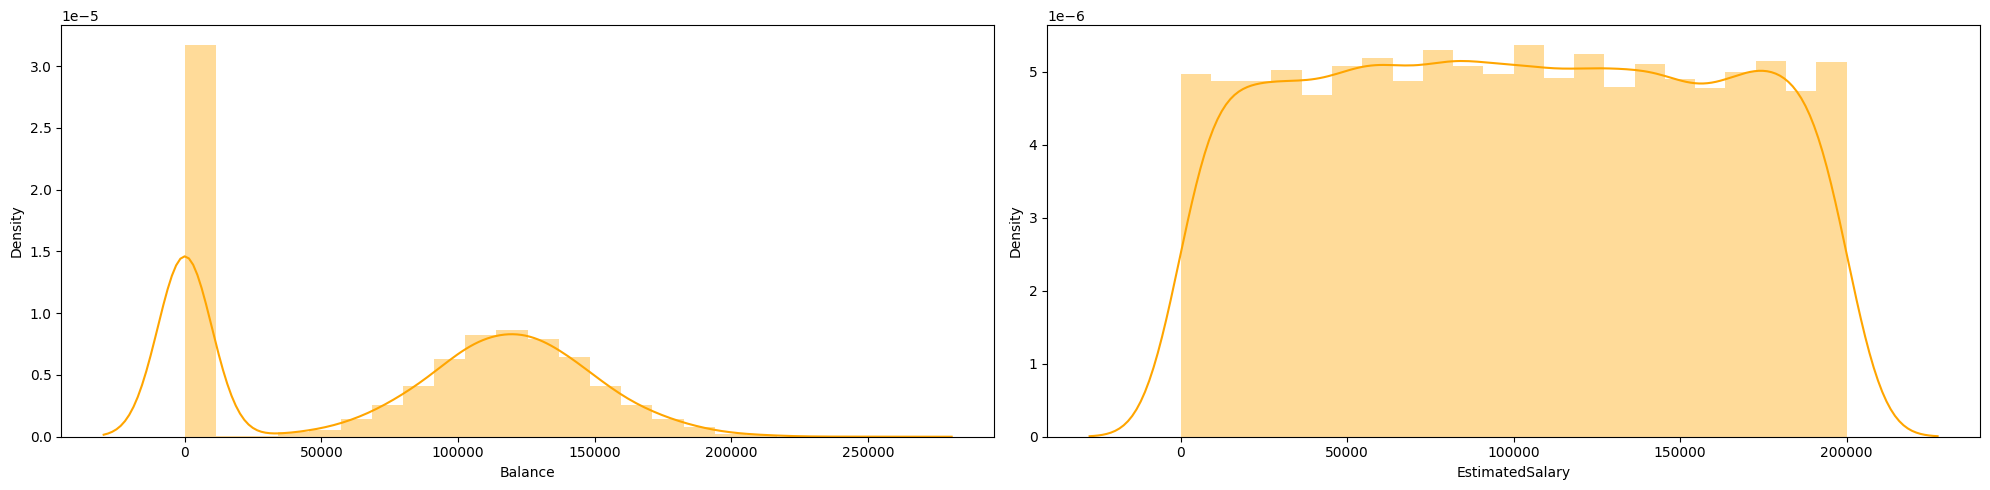

In [19]:
plt.figure(figsize=(20,5))
for i in range(0,len(numeric)):
    plt.subplot(1, len(numeric), i+1)
    sns.distplot(df[numeric[i]], color='orange')
    plt.tight_layout()

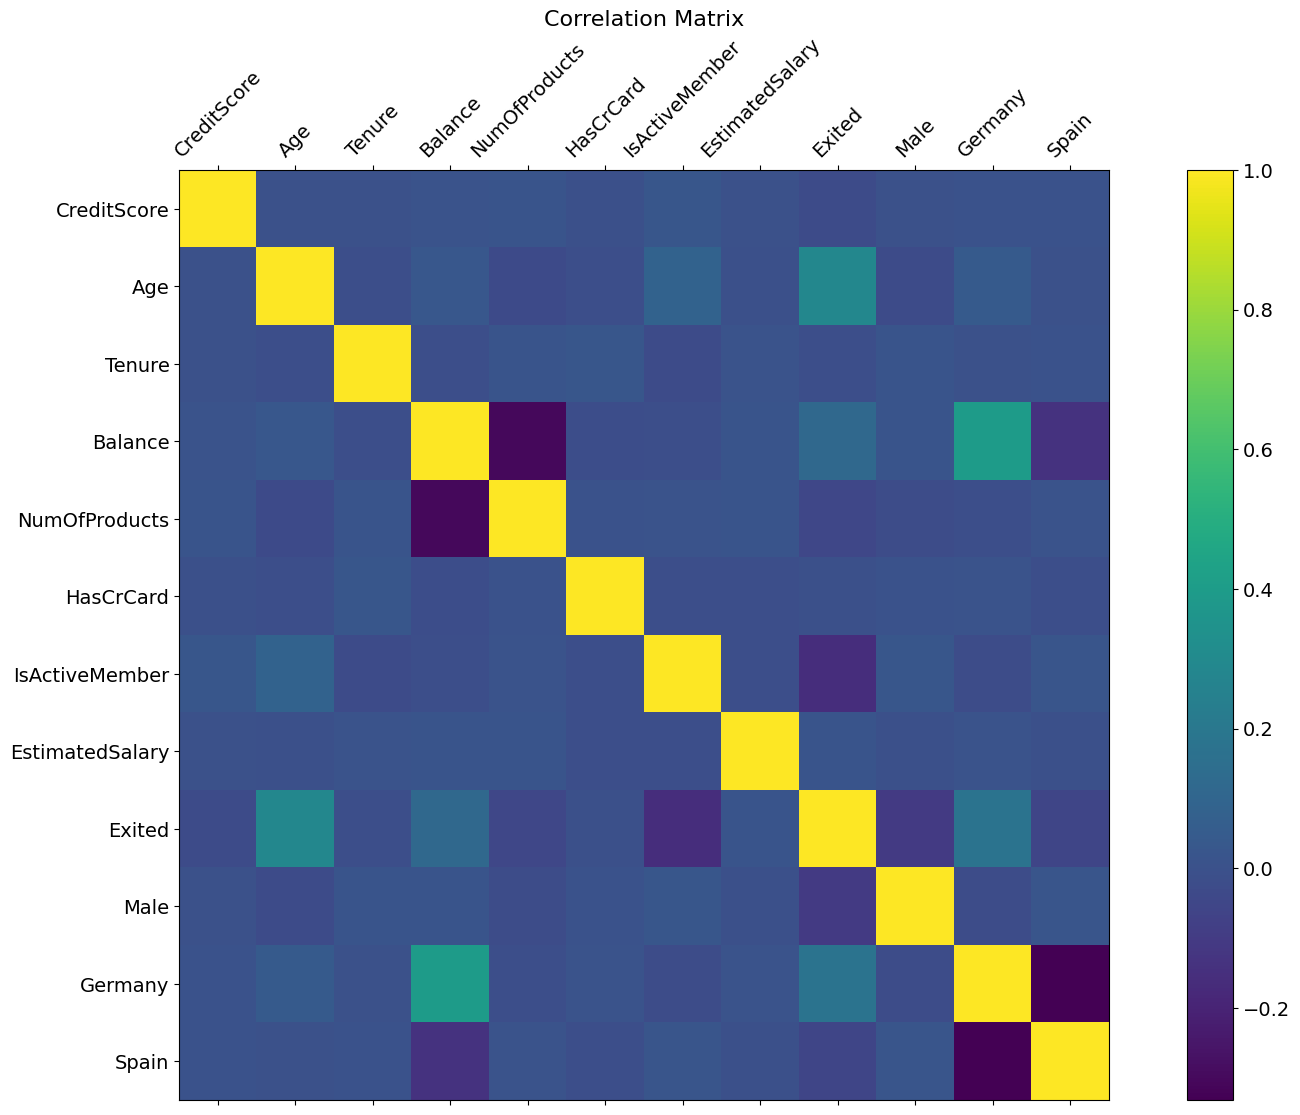

In [20]:
f = plt.figure(figsize=(20, 12))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [21]:
df_balance = df[df['Balance'] > 0]



<ipython-input-22-500315637cd0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_balance[numeric[i]], color='orange')
<ipython-input-22-500315637cd0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_balance[numeric[i]], color='orange')


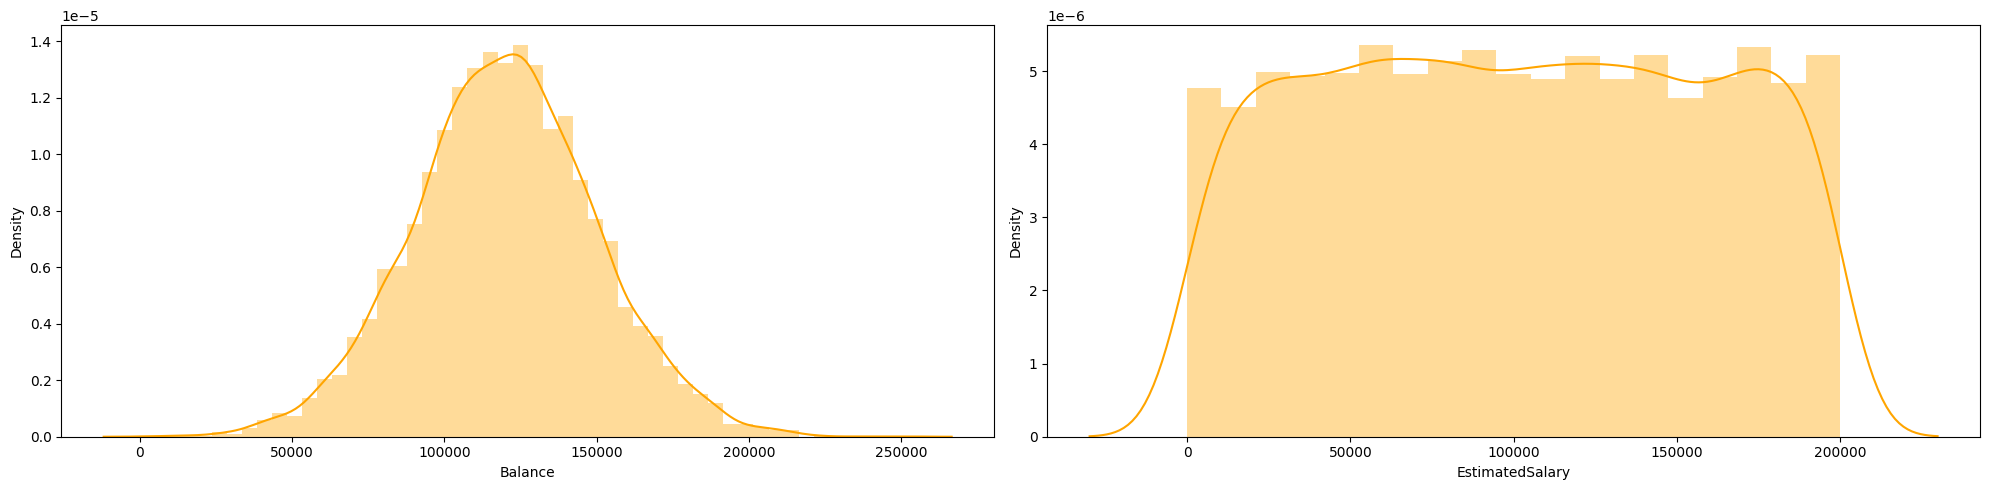

In [22]:
plt.figure(figsize=(20,5))
for i in range(0,len(numeric)):
    plt.subplot(1, len(numeric), i+1)
    sns.distplot(df_balance[numeric[i]], color='orange')
    plt.tight_layout()
    ####

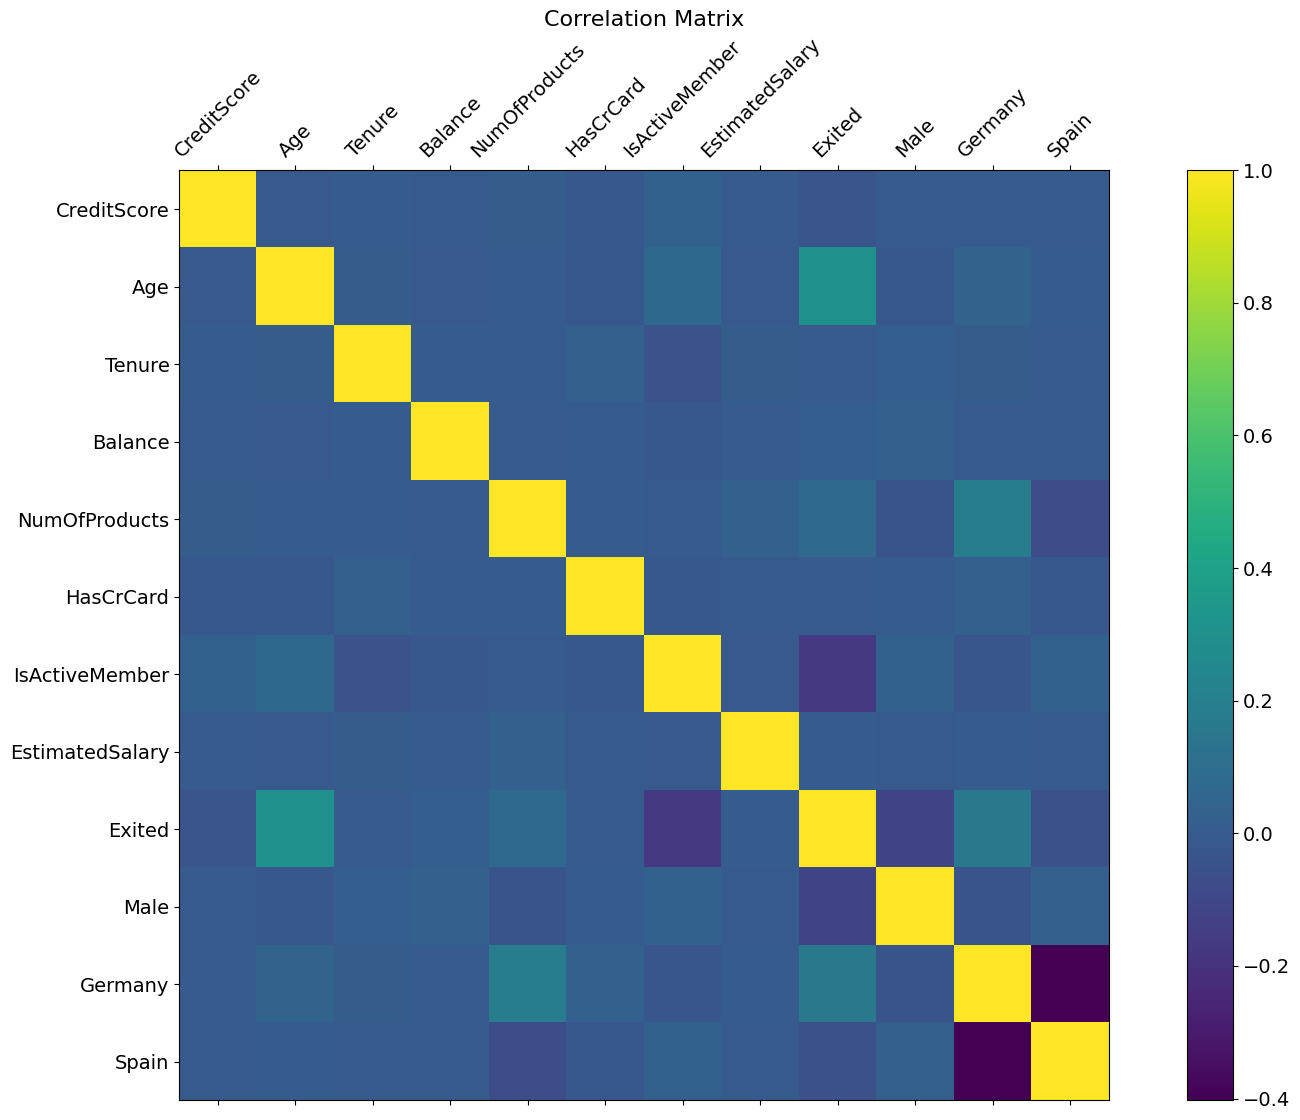

In [23]:
f = plt.figure(figsize=(20, 12))
plt.matshow(df_balance.corr(), fignum=f.number)
plt.xticks(range(df_balance.select_dtypes(['number']).shape[1]), df_balance.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_balance.select_dtypes(['number']).shape[1]), df_balance.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [24]:
df_balance.shape[0]

6383

# Testando Modelos sem balanceamento dos dados

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier

In [26]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

In [52]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Exited'), df.Exited, test_size=0.3, random_state=1)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
pd.DataFrame(data = X_train, columns = df.columns[:-1])

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany
0,-0.060429,-0.185279,1.028680,-1.226424,0.798528,0.641985,-1.019038,-1.376867,-1.086281,-0.583509,-0.572731
1,-1.743631,0.005323,0.334765,-1.226424,-0.915051,0.641985,0.981317,-1.312339,-1.086281,-0.583509,-0.572731
2,0.311322,-0.185279,1.722596,0.761149,-0.915051,0.641985,-1.019038,-0.318843,-1.086281,-0.583509,-0.572731
3,0.414586,-0.947689,-0.012193,-1.226424,0.798528,0.641985,-1.019038,0.147481,0.920572,-0.583509,-0.572731
4,0.063488,0.577131,0.681722,1.116374,-0.915051,0.641985,0.981317,1.727595,-1.086281,-0.583509,-0.572731
...,...,...,...,...,...,...,...,...,...,...,...
6995,-0.297936,0.767733,0.681722,0.497175,-0.915051,0.641985,0.981317,-0.579444,0.920572,1.713770,-0.572731
6996,0.352627,2.292554,-0.706109,0.077888,-0.915051,0.641985,-1.019038,-0.529960,-1.086281,1.713770,-0.572731
6997,0.228710,0.577131,1.375638,-1.226424,-0.915051,0.641985,0.981317,-0.140485,-1.086281,-0.583509,-0.572731
6998,0.135773,0.005323,1.028680,-1.226424,0.798528,0.641985,0.981317,0.018567,-1.086281,-0.583509,-0.572731


In [54]:
def previsor(modelo,parametros=''):
  modelo.fit(X_train, y_train)
  modelo_pred = modelo.predict(X_test)
  print(classification_report(y_test, modelo_pred))
  return modelo_pred

In [58]:
model = KNeighborsClassifier(n_neighbors = 3)
previsor(model)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2373
           1       0.59      0.39      0.47       627

    accuracy                           0.82      3000
   macro avg       0.72      0.66      0.68      3000
weighted avg       0.80      0.82      0.80      3000



array([0, 0, 0, ..., 0, 0, 0])

In [59]:
model = RandomForestClassifier()
previsor(model)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2373
           1       0.79      0.46      0.58       627

    accuracy                           0.86      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.85      0.86      0.85      3000



array([0, 0, 0, ..., 0, 0, 0])

In [60]:
model = DecisionTreeClassifier()
previsor(model)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2373
           1       0.51      0.53      0.52       627

    accuracy                           0.80      3000
   macro avg       0.69      0.70      0.70      3000
weighted avg       0.80      0.80      0.80      3000



array([0, 1, 0, ..., 0, 0, 0])

In [61]:
from xgboost import XGBClassifier
model = XGBClassifier(objective="binary:logistic")
previsor(model)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2373
           1       0.73      0.51      0.60       627

    accuracy                           0.86      3000
   macro avg       0.81      0.73      0.76      3000
weighted avg       0.85      0.86      0.85      3000



array([0, 0, 0, ..., 0, 0, 0])

# Testando Modelos com balanceamento (undersampling) dos dados

In [63]:
from imblearn.under_sampling import RandomUnderSampler

In [69]:
sampler = RandomUnderSampler(random_state=26)
X = df.drop(columns='Exited')
y = df.Exited
X,y = sampler.fit_resample(X, y)


In [72]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
pd.DataFrame(data = X_train, columns = df.columns[:-1]).head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany
0,1.029497,-1.785412,-0.673437,0.622453,-0.756007,0.637583,-0.915516,0.481324,0.985721,-0.679744,1.858679
1,1.009229,-0.205554,1.376352,0.804275,-0.756007,0.637583,1.092281,-0.708685,-1.014486,-0.679744,-0.538017
2,-1.970267,0.630842,0.009826,0.998916,-0.756007,0.637583,1.092281,-0.130720,-1.014486,-0.679744,1.858679
3,-1.483819,0.073245,-1.698331,0.790247,-0.756007,-1.568423,1.092281,-1.250714,-1.014486,1.471143,-0.538017
4,-1.200057,-1.134882,0.009826,-1.355817,0.721290,-1.568423,-0.915516,0.357297,-1.014486,-0.679744,-0.538017


In [75]:
model = KNeighborsClassifier(n_neighbors = 3)
previsor(model)

              precision    recall  f1-score   support

           0       0.69      0.72      0.71       622
           1       0.70      0.67      0.68       601

    accuracy                           0.70      1223
   macro avg       0.70      0.69      0.69      1223
weighted avg       0.70      0.70      0.69      1223



array([1, 1, 0, ..., 1, 1, 1])

In [76]:
model = RandomForestClassifier()
previsor(model)

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       622
           1       0.76      0.74      0.75       601

    accuracy                           0.76      1223
   macro avg       0.76      0.76      0.76      1223
weighted avg       0.76      0.76      0.76      1223



array([1, 0, 1, ..., 1, 1, 1])

In [77]:
model = DecisionTreeClassifier()
previsor(model)

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       622
           1       0.69      0.69      0.69       601

    accuracy                           0.69      1223
   macro avg       0.69      0.69      0.69      1223
weighted avg       0.69      0.69      0.69      1223



array([1, 0, 0, ..., 1, 1, 1])

In [78]:
from xgboost import XGBClassifier
model = XGBClassifier(objective="binary:logistic")
previsor(model)

              precision    recall  f1-score   support

           0       0.76      0.77      0.77       622
           1       0.76      0.75      0.75       601

    accuracy                           0.76      1223
   macro avg       0.76      0.76      0.76      1223
weighted avg       0.76      0.76      0.76      1223



array([1, 0, 1, ..., 1, 1, 1])